# Big Data - Statistics
## Phase one - Data extraction and modification

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

import xml.etree.ElementTree as et

xtree = et.parse("export.xml")
xroot = xtree.getroot()

dataArray = []

for node in xroot:
    if (node.attrib.get("type") == "HKQuantityTypeIdentifierDistanceCycling") :
        d_distance = node.attrib.get("value")
        d_date = node.attrib.get("startDate")[0:10]
        dataArray.append([d_distance, d_date])

transformationArray = []

for dataSection in dataArray:
    indexes = np.where(np.array(dataArray)==dataSection[1])
    
    transformationSection = []
    totalDistance = 0
    
    for index in indexes[0]:
        totalDistance += float(dataArray[index][0])
    
    transformationSection.append(totalDistance)
    transformationSection.append(dataSection[1])
    
    if(len(np.where(np.array(transformationArray)==dataSection[1])[0]) == 0):
        transformationArray.append(transformationSection)

df_cols = ["distance", "date", "day_of_week"]
df_out = pd.DataFrame(columns = df_cols)

for tSection in transformationArray:
    df_out = df_out.append(pd.Series([float(tSection[0]), tSection[1], dt.datetime.strptime(tSection[1], "%Y-%m-%d").strftime("%A")], index = df_cols), ignore_index=True)

print(df_out.to_string())

    distance        date day_of_week
0        7.4  2019-03-07    Thursday
1        7.4  2019-03-08      Friday
2        3.7  2019-03-09    Saturday
3        3.7  2019-03-11      Monday
4        7.4  2019-03-12     Tuesday
5        7.4  2019-03-13   Wednesday
6        7.4  2019-03-14    Thursday
7       28.1  2019-04-23     Tuesday
8       12.0  2019-04-20    Saturday
9        4.0  2019-03-15      Friday
10       8.2  2019-03-16    Saturday
11       8.2  2019-03-19     Tuesday
12       8.2  2019-03-20   Wednesday
13       8.2  2019-03-21    Thursday
14       8.2  2019-03-22      Friday
15       8.2  2019-03-23    Saturday
16       8.2  2019-03-26     Tuesday
17       8.2  2019-03-27   Wednesday
18       8.2  2019-03-28    Thursday
19       8.2  2019-03-29      Friday
20       8.2  2019-03-30    Saturday
21       8.2  2019-04-02     Tuesday
22       8.2  2019-04-03   Wednesday
23      15.2  2019-04-24   Wednesday
24       8.2  2019-04-16     Tuesday
25       8.2  2019-04-17   Wednesday
2

/Users/yen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [3]:
print("Average: " + str(np.average(df_out.distance)))
print("Median: " + str(np.median(df_out.distance, axis = None)))

Average: 11.69264705882353
Median: 8.2


In [20]:
df_out.mode(axis=0,numeric_only=True,dropna=True)

,distance
0,8.2


In [18]:
print(df_out["distance"].max() - df_out["distance"].min())

45.3


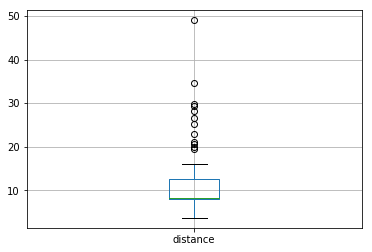

In [2]:
df_out.boxplot(column="distance")

In [21]:
df_out.std()

distance    8.330421
dtype: float64

In [23]:
df_out.corr()

,distance
distance,1.0


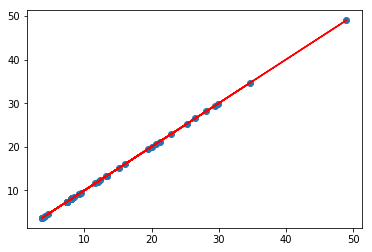

In [29]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = df_out.iloc[:, 0].values.reshape(-1, 1)
Y = df_out.iloc[:, 0].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()